In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("D:/Project/III Year/archive/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='binary')
test_dataset = test.flow_from_directory("D:/Project/III Year/archive/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='binary')

test_dataset.class_indices


Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


{'fire': 0, 'nofire': 1}

In [12]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
r=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
58/58 [==============================] - 29s 437ms/step - loss: 0.6869 - accuracy: 0.8570 - val_loss: 0.3284 - val_accuracy: 0.8971
Epoch 2/10
58/58 [==============================] - 24s 408ms/step - loss: 0.1675 - accuracy: 0.9427 - val_loss: 0.4979 - val_accuracy: 0.7647
Epoch 3/10
58/58 [==============================] - 25s 424ms/step - loss: 0.1470 - accuracy: 0.9476 - val_loss: 0.2970 - val_accuracy: 0.8971
Epoch 4/10
58/58 [==============================] - 23s 392ms/step - loss: 0.1409 - accuracy: 0.9498 - val_loss: 0.3365 - val_accuracy: 0.8529
Epoch 5/10
58/58 [==============================] - 23s 389ms/step - loss: 0.1315 - accuracy: 0.9531 - val_loss: 0.1739 - val_accuracy: 0.9559
Epoch 6/10
58/58 [==============================] - 23s 403ms/step - loss: 0.1097 - accuracy: 0.9656 - val_loss: 0.2897 - val_accuracy: 0.8676
Epoch 7/10
58/58 [==============================] - 25s 422ms/step - loss: 0.0844 - accuracy: 0.9765 - val_loss: 0.1852 - val_accuracy: 0.9118

In [15]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 [==============================] - 0s 61ms/step


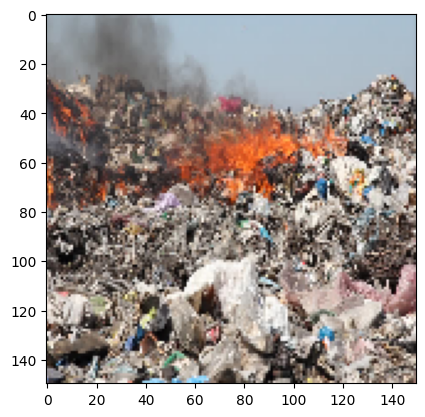

1/1 [==============================] - 0s 171ms/step
No Fire


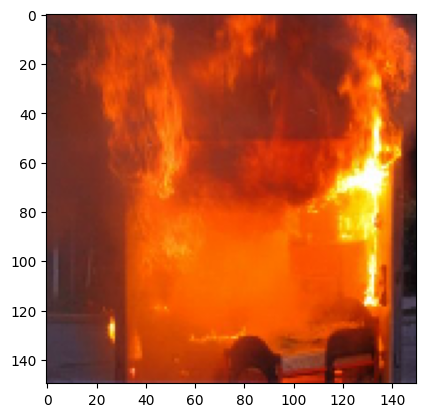

1/1 [==============================] - 0s 46ms/step
Fire


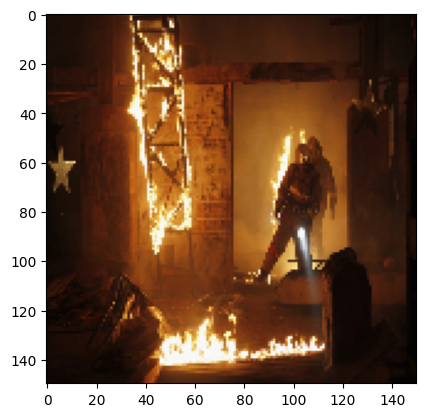

1/1 [==============================] - 0s 42ms/step
Fire
File Not Found: 4.jpg


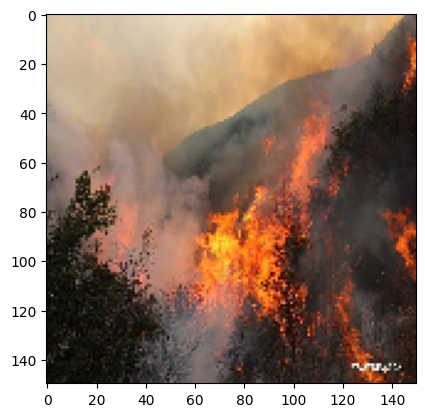

1/1 [==============================] - 0s 49ms/step
Fire


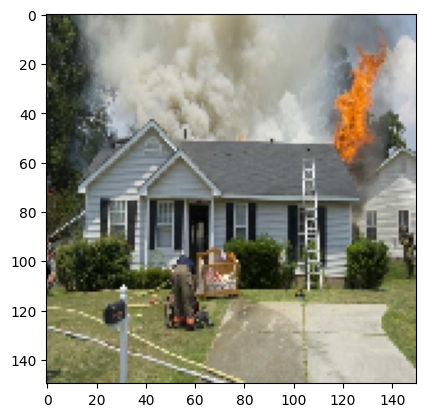

1/1 [==============================] - 0s 48ms/step
No Fire


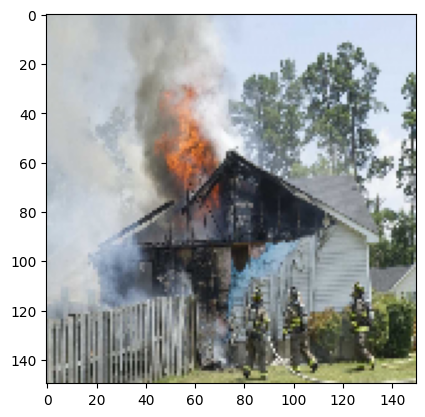

1/1 [==============================] - 0s 52ms/step
No Fire


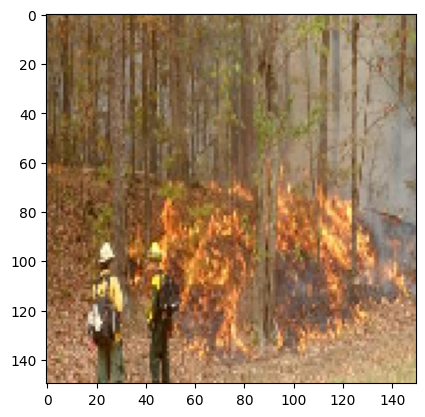

1/1 [==============================] - 0s 58ms/step
Fire


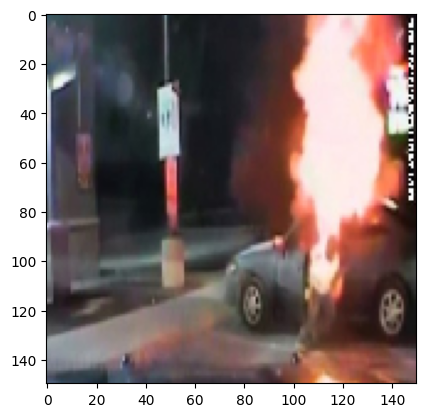

1/1 [==============================] - 0s 35ms/step
Fire


In [16]:
def pi(filename):
    img = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img)
    #plt.axis('off')  # Turn off axis for better visualization
    plt.show()

    # Preprocess the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    prediction = model.predict(img_array)

    # Display the prediction result
    if prediction[0][0] > 0.5:  # Assuming 0 is fire, and 1 is no fire
        label = "No Fire"
    else:
        label = "Fire"
    print(label)
    #plt.xlabel(label, fontsize=12)
    #plt.show()

# Assuming you have images named from 1.jpg to 9.jpg
for i in range(1, 10):
    try:
        filename = f"D:/Project/III Year/Fire-Detection/train/1/{i}.jpg"
        pi(filename)
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")


In [17]:
def picount(filename):
    img = image.load_img(filename, target_size=(150, 150))
    #plt.imshow(img)
    #plt.axis('off')  # Turn off axis for better visualization
    #plt.show()

    # Preprocess the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    prediction = model.predict(img_array)

    # Display the prediction result
    if prediction[0][0] > 0.5:  # Assuming 0 is fire, and 1 is no fire
        label = "No Fire"
    else:
        label = "Fire"
    #print(label)
    #plt.xlabel(label, fontsize=12)
    #plt.show()
    return label
l=[]
# Assuming you have images named from 1.jpg to 9.jpg
for i in range(1, 100):
    try:
        filename = f"D:/Project/III Year/Fire-Detection/train/1/{i}.jpg"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 33ms/step
File Not Found: 4.jpg
1/1 [==============================] - 0s 40ms/step
File Not Found: 33.jpg
1/1 [==============================] - 0s 38ms/step
File Not Found: 97.jpg
1/1 [==============================] - 0s 43ms/step
88 8 96


In [26]:
l=[]
for i in range(1, 756):
    try:
        filename = f"D:/Project/III Year/fire_dataset/train/1/fire.{i}.png"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 48ms/step
717 38 755


In [31]:
l=[]
for i in range(1, 244):
    try:
        filename = f"D:/Project/III Year/fire_dataset/train/0/non_fire.{i}.png"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 46ms/step
23 220 243
